### NLP Classification Project

##### Building a spam filter with the kernel framework. 

Emails are either classed as undersired "spam" or "ham". This classification task is applies and uses variants of edit distance within a kernel framework. LibSVM algorithm is then applied to clasify the data as either "ham" or "spam". The <a href = "https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection">SMS Spam Collection Data Set</a> from UCI machine learning repository 

* Clean the data
* Carry out data exploration
* split, tokenize, remove punctuation
* Extract features
* Construct kernels
* Run classification 
* Compare and analyse

In [312]:
#Import required files
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import re
import string
from libsvm.svmutil import *
import util
import seaborn as sns


%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [105]:
pwd

'/Users/osita/Documents/GitHub/NLP-classification'

In [32]:
pd.read_csv?

### Explore the Data

In [88]:

data2 = pd.read_csv("/Users/osita/Documents/GitHub/NLP-classification/data/SMSSpamCollection", sep='\t', header=None,
                   names=['label','Text'])

In [89]:
data2.head()

,label,Text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [90]:
print('The data is made up of {} examples '.format(data2.shape))

The data is made up of (5572, 2) examples 


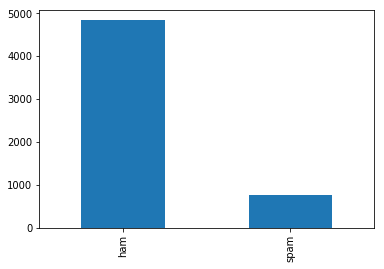

In [118]:
data2.label.value_counts().plot(kind='bar')

In [91]:
len_ham = data2[data2['label']=='ham'].count()[0]
print('{} examples classed as ham'.format(len_ham))

4825 examples classed as ham


In [92]:
len_spam = data2[data2['label']=='spam'].count()[0]
print('{} examples classed as spam'.format(len_spam))

747 examples classed as spam


In [94]:
# View an example of the text
data2['Text'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

### Missing - 
* Add the plots

### Helper Functions

### Remove punctuations from the string of words

In [64]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [65]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation]) # joins the character with no spaces in between
    return text_nopunct

In [83]:
def remove_punction(word):
    no_punctuation = []
    for letter in word:
        if letter not in string.punctuation:
            no_punctuation.append(letter)
    no_punctuation = "".join(no_punctuation)
    
    return no_punctuation

In [97]:
#Use the apply button to apply this function to the body_list
data2['Text_no_punct'] = data2['Text'].apply(lambda x: remove_punction(x)) #Applies the function to each row
data2.head(10)

,label,Text,Text_no_punct
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
5,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,FreeMsg Hey there darling its been 3 weeks now and no word back Id like some fun you up for it s...
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,As per your request Melle Melle Oru Minnaminunginte Nurungu Vettam has been set as your callertu...
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,WINNER As a valued network customer you have been selected to receivea £900 prize reward To clai...
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,Had your mobile 11 months or more U R entitled to Update to the latest colour mobiles with camer...


### Tokenize the string of words

In [98]:
import re

def tokenize(words):
    tokens = re.split('\W+', words) # split on non word character
    return tokens

In [101]:
data2['Text_tokenize'] = data2['Text_no_punct'].apply(lambda x: tokenize(x)) #Applies the function to each row
data2.head(10)

,label,Text,Text_no_punct,Text_tokenize
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[Go, until, jurong, point, crazy, Available, only, in, bugis, n, great, world, la, e, buffet, Ci..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[Free, entry, in, 2, a, wkly, comp, to, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, to..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[Nah, I, dont, think, he, goes, to, usf, he, lives, around, here, though]"
5,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,FreeMsg Hey there darling its been 3 weeks now and no word back Id like some fun you up for it s...,"[FreeMsg, Hey, there, darling, its, been, 3, weeks, now, and, no, word, back, Id, like, some, fu..."
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[Even, my, brother, is, not, like, to, speak, with, me, They, treat, me, like, aids, patent]"
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,As per your request Melle Melle Oru Minnaminunginte Nurungu Vettam has been set as your callertu...,"[As, per, your, request, Melle, Melle, Oru, Minnaminunginte, Nurungu, Vettam, has, been, set, as..."
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,WINNER As a valued network customer you have been selected to receivea £900 prize reward To clai...,"[WINNER, As, a, valued, network, customer, you, have, been, selected, to, receivea, 900, prize, ..."
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,Had your mobile 11 months or more U R entitled to Update to the latest colour mobiles with camer...,"[Had, your, mobile, 11, months, or, more, U, R, entitled, to, Update, to, the, latest, colour, m..."


### Remove stop words

In [102]:
import nltk

stopword = nltk.corpus.stopwords.words('english')

In [103]:
#To remove the stopwords we define our own function
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

In [104]:
data2['Text_nostop_words'] = data2['Text_tokenize'].apply(lambda x: remove_stopwords(x)) #Applies the function to each row
data2.head(10)

,label,Text,Text_no_punct,Text_tokenize,Text_nostop_words
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[Go, until, jurong, point, crazy, Available, only, in, bugis, n, great, world, la, e, buffet, Ci...","[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[Free, entry, in, 2, a, wkly, comp, to, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, to...","[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, then, say]","[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[Nah, I, dont, think, he, goes, to, usf, he, lives, around, here, though]","[Nah, I, dont, think, goes, usf, lives, around, though]"
5,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,FreeMsg Hey there darling its been 3 weeks now and no word back Id like some fun you up for it s...,"[FreeMsg, Hey, there, darling, its, been, 3, weeks, now, and, no, word, back, Id, like, some, fu...","[FreeMsg, Hey, darling, 3, weeks, word, back, Id, like, fun, still, Tb, ok, XxX, std, chgs, send..."
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[Even, my, brother, is, not, like, to, speak, with, me, They, treat, me, like, aids, patent]","[Even, brother, like, speak, They, treat, like, aids, patent]"
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,As per your request Melle Melle Oru Minnaminunginte Nurungu Vettam has been set as your callertu...,"[As, per, your, request, Melle, Melle, Oru, Minnaminunginte, Nurungu, Vettam, has, been, set, as...","[As, per, request, Melle, Melle, Oru, Minnaminunginte, Nurungu, Vettam, set, callertune, Callers..."
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,WINNER As a valued network customer you have been selected to receivea £900 prize reward To clai...,"[WINNER, As, a, valued, network, customer, you, have, been, selected, to, receivea, 900, prize, ...","[WINNER, As, valued, network, customer, selected, receivea, 900, prize, reward, To, claim, call,..."
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,Had your mobile 11 months or more U R entitled to Update to the latest colour mobiles with camer...,"[Had, your, mobile, 11, months, or, more, U, R, entitled, to, Update, to, the, latest, colour, m...","[Had, mobile, 11, months, U, R, entitled, Update, latest, colour, mobiles, camera, Free, Call, T..."


In [106]:

def clean_text(word):
    
    '''
    import nltk
    import re
    import string
    string.punctuation
    stopword = nltk.corpus.stopwords.words('english')
    '''
    no_punctuation = []
    for letter in word:
        if letter not in string.punctuation:
            no_punctuation.append(letter)
    no_punctuation = "".join(no_punctuation)
    
    text_tokenize = re.split('\W+', no_punctuation) # toknize by spliting on non word character
    text_cleaned = [word for word in text_tokenize if word not in stopword]
    
    return text_cleaned

In [107]:
data2['Text_cleaned'] = data2['Text'].apply(lambda x: clean_text(x)) #Applies the function to each row
data2.head(10)

,label,Text,Text_no_punct,Text_tokenize,Text_nostop_words,Text_cleaned
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[Go, until, jurong, point, crazy, Available, only, in, bugis, n, great, world, la, e, buffet, Ci...","[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]","[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[Free, entry, in, 2, a, wkly, comp, to, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, to...","[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv...","[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, then, say]","[U, dun, say, early, hor, U, c, already, say]","[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[Nah, I, dont, think, he, goes, to, usf, he, lives, around, here, though]","[Nah, I, dont, think, goes, usf, lives, around, though]","[Nah, I, dont, think, goes, usf, lives, around, though]"
5,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,FreeMsg Hey there darling its been 3 weeks now and no word back Id like some fun you up for it s...,"[FreeMsg, Hey, there, darling, its, been, 3, weeks, now, and, no, word, back, Id, like, some, fu...","[FreeMsg, Hey, darling, 3, weeks, word, back, Id, like, fun, still, Tb, ok, XxX, std, chgs, send...","[FreeMsg, Hey, darling, 3, weeks, word, back, Id, like, fun, still, Tb, ok, XxX, std, chgs, send..."
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[Even, my, brother, is, not, like, to, speak, with, me, They, treat, me, like, aids, patent]","[Even, brother, like, speak, They, treat, like, aids, patent]","[Even, brother, like, speak, They, treat, like, aids, patent]"
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,As per your request Melle Melle Oru Minnaminunginte Nurungu Vettam has been set as your callertu...,"[As, per, your, request, Melle, Melle, Oru, Minnaminunginte, Nurungu, Vettam, has, been, set, as...","[As, per, request, Melle, Melle, Oru, Minnaminunginte, Nurungu, Vettam, set, callertune, Callers...","[As, per, request, Melle, Melle, Oru, Minnaminunginte, Nurungu, Vettam, set, callertune, Callers..."
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,WINNER As a valued network customer you have been selected to receivea £900 prize reward To clai...,"[WINNER, As, a, valued, network, customer, you, have, been, selected, to, receivea, 900, prize, ...","[WINNER, As, valued, network, customer, selected, receivea, 900, prize, reward, To, claim, call,...","[WINNER, As, valued, network, customer, selected, receivea, 900, prize, reward, To, claim, call,..."
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,Had your mobile 11 months or more U R entitled to Update to the latest colour mobiles with camer...,"[Had, your, mobile, 11, months, or, mo

### Clean data directly

In [327]:
corpus = pd.read_csv("/Users/osita/Documents/GitHub/NLP-classification/data/SMSSpamCollection", sep='\t', header=None,
                   names=['label','Text'])

In [328]:
corpus['Text_cleaned'] = corpus['Text'].apply(lambda x: clean_text(x)) #Applies the function to each row
corpus.head(10)

,label,Text,Text_cleaned
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[Nah, I, dont, think, goes, usf, lives, around, though]"
5,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,"[FreeMsg, Hey, darling, 3, weeks, word, back, Id, like, fun, still, Tb, ok, XxX, std, chgs, send..."
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[Even, brother, like, speak, They, treat, like, aids, patent]"
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[As, per, request, Melle, Melle, Oru, Minnaminunginte, Nurungu, Vettam, set, callertune, Callers..."
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,"[WINNER, As, valued, network, customer, selected, receivea, 900, prize, reward, To, claim, call,..."
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,"[Had, mobile, 11, months, U, R, entitled, Update, latest, colour, mobiles, camera, Free, Call, T..."


### Use Porter Stemming

In [329]:
#import nltk

ps = nltk.PorterStemmer()

In [330]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [331]:
corpus['Text_stemmed'] = corpus['Text_cleaned'].apply(lambda x: stemming(x))

corpus.head()

,label,Text,Text_cleaned,Text_stemmed
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]","[Go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv...","[free, entri, 2, wkli, comp, win, FA, cup, final, tkt, 21st, may, 2005, text, FA, 87121, receiv,..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]","[U, dun, say, earli, hor, U, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[Nah, I, dont, think, goes, usf, lives, around, though]","[nah, I, dont, think, goe, usf, live, around, though]"


### Lemmatize the data

In [332]:
#import nltk
wn = nltk.WordNetLemmatizer() #There are different types of lemmatizers

In [333]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text



In [334]:
corpus['Text_lemmatized'] = corpus['Text_stemmed'].apply(lambda x: lemmatizing(x))

corpus.head()

,label,Text,Text_cleaned,Text_stemmed,Text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]","[Go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[Go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, joke, wif, u, oni]","[Ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv...","[free, entri, 2, wkli, comp, win, FA, cup, final, tkt, 21st, may, 2005, text, FA, 87121, receiv,...","[free, entri, 2, wkli, comp, win, FA, cup, final, tkt, 21st, may, 2005, text, FA, 87121, receiv,..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]","[U, dun, say, earli, hor, U, c, alreadi, say]","[U, dun, say, earli, hor, U, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[Nah, I, dont, think, goes, usf, lives, around, though]","[nah, I, dont, think, goe, usf, live, around, though]","[nah, I, dont, think, goe, usf, live, around, though]"


In [335]:
corpus['Text_cleaned'][1]

['Ok', 'lar', 'Joking', 'wif', 'u', 'oni']

#### Edit distance

In [336]:
def editdistance(s,t):
    
    import numpy as np
    m = len(s)
    n = len(t)
    H = np.zeros((m+1, n+1))
    
    for i in range(0,m+1):
        H[i,0] = i
    
    for j in range(0,n+1):
        H[0,j] = j
    
    for i in range(1,m+1):
        for j in range(1, n+1):
            
            if s[i-1] == t[j-1]:
                H[i,j] = H[i-1,j-1]
            else:
                H[i,j] = min(H[i-1,j] + 1, H[i,j-1] + 1, H[i-1,j-1] + 1) #deletion, insertion, substitution
    
    return H[-1,-1]

In [342]:
#corpus['label'].
corpus.replace({'label': {'ham': -1, 'spam': 1}}, inplace=True)

In [343]:
corpus['label'].value_counts()

-1    4825
 1     747
Name: label, dtype: int64

In [344]:
corpus.head()

,label,Text,Text_cleaned,Text_stemmed,Text_lemmatized
0,-1,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]","[Go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[Go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,-1,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, joke, wif, u, oni]","[Ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv...","[free, entri, 2, wkli, comp, win, FA, cup, final, tkt, 21st, may, 2005, text, FA, 87121, receiv,...","[free, entri, 2, wkli, comp, win, FA, cup, final, tkt, 21st, may, 2005, text, FA, 87121, receiv,..."
3,-1,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]","[U, dun, say, earli, hor, U, c, alreadi, say]","[U, dun, say, earli, hor, U, c, alreadi, say]"
4,-1,"Nah I don't think he goes to usf, he lives around here though","[Nah, I, dont, think, goes, usf, lives, around, though]","[nah, I, dont, think, goe, usf, live, around, though]","[nah, I, dont, think, goe, usf, live, around, though]"


In [374]:
Y = corpus.label.values
X = corpus.Text_lemmatized.values

In [375]:
def splitdata(X, Y, rand_seed, tnx):
    '''
    Function used to split data into training, test and validation datastes
    This takes the predictor variables X and response variables Y, and 
    
    '''
    import numpy as np
    m = X.shape[0]
    #n = X.shape[1] 
    np.random.seed(rand_seed)
    ind1 = np.random.permutation(m)
    if (tnx > 1) or (tnx < 0) :
        print("This should be greater than 0 and less than 1")

    len1= int(np.round(len(ind1)* tnx, 0))
    len2= int(np.round(len(ind1)* (1-tnx)/2, 0))

    #print(len1)
    #print(len2)

    xtr  = X[ind1[0:len1]]
    xva  = X[ind1[len1:(len1+len2)]]
    xte  = X[ind1[(len1+len2):]]
    
    ytr  = Y[ind1[0:len1]]
    yva  = Y[ind1[len1:(len1+len2)]]
    yte  = Y[ind1[(len1+len2):]]
    
    print('{} training examples'.format(xtr.shape[0]))
    print('{} validation examples'.format(xva.shape[0]))
    print('{} testing examples'.format(xte.shape[0]))
    
    return xtr, xva, xte, ytr.reshape(len(ytr),1), yva.reshape(len(yva),1), yte.reshape(len(yte),1)

In [376]:
def EvaluateTest(ylabel, Pred):
       
    FN=0
    FP=0
    TP=0
    TN=0
   
    for i in range(0,ylabel.shape[0]):
        if (ylabel[i]==Pred[i]).any():
            if (Pred[i]==1).any():
                TP+=1
            elif Pred[i]!=1:
                TN+=1
        if (ylabel[i]!=Pred[i]).any():
            if (Pred[i]==1).any():
                FP+=1
            elif Pred[i]!=1:
                FN+=1
        #print(ylabel[i], Pred[i])
    TOTAL = TP + TN + FP + FN
    TPN  = TP+ TN
    
    print("--> The total of {0} predicted with only {1} accurate predictions".format(TOTAL,TPN))
    print('')
    print('='*25)
    print('Ground Truth comparison')
    print('='*25)
    print("Actual label is True while we predicted True - True Positive",format(TP))
    print("Actual label is False while we predicted True - False Positive",format(FP))
    print("Actual label is True while we predicted False - False Negative",format(FN))
    print("Actual label is False while we predicted False - True Negatve",format(TN))  
    print('') 
    #try:
    Pos        = TP+FP                                   # sum of TP and FP
    Neg        = TN+FN
    accu       = np.round(((TP+TN)/(TP+FN+FP+TN)*100),2)
    #sen        = TP/(TP+FN)  
    if (TP+FN) == 0:
        sen    = 0
        miss   = 0
        recall = 0
        print("No True positives or False negatives predicted")
        print("Sensitivity set to zero 0")
        print("Miss (false negative rate) set to 0")
        print("Recall value set to 0")
        print('='*45)
    else:
        sen    = np.round(TP/(TP+FN),2)      # true positive rate,sensitivity,recall
        miss   = np.round(FN/(TP+FN),2)      # false negative rate, miss
        recall = np.round(TP/(TP+FN),2)      # Recall describes the completeness of the classification
   
    if (TN + FP) == 0:
        spec = 0
        fall = 0
        print("No True positives or False negatves predicted")
        print("Specificity set to 0")
        print("Fallout (false positive rate) set to 0")
        print('='*45)
    else:
        spec   = np.round(TN/(TN+FP),2)     # true negative rate, specificity7
        fall   = np.round(FP/(TN+FP),2)     # false positive rate, fallout
    
    if (TN+FN) == 0:
        NPV = 0
        print("No Negative outcomes predicted")
        print("Negative predicted value set to 0")
        print('='*45)
    else:
        NPV        = np.round(TN/(TN+FN),2)                  # negative predictive value
     
    if (TP+FP) == 0:
        precision = 0
        print("No True positives or False positives predicted")
        print('='*45)
    else:
        precision  = np.round(TP/(TP+FP),2)                  # precision measures the actual accuracy of the classification
        
    RPP        = np.round((TP+FP)/(TP+FN+FP+TN),2)           # rate of positive predictions
    RNP        = np.round((TN+FN)/(TP+FN+FP+TN),2)           # rate of negative predictions
    
    if (precision + recall) == 0:
        Fscore = 0
        print("Fscore cannot be calculated as denominator is 0")
        print('='*45)
    else:
        Fscore = np.round(2 * ((precision * recall) / (precision + recall)),2)
    
    
    print("--> {} positive outcomes prediticted".format(Pos))
    print("--> {} negative outcomes prediticted".format(Neg))
    print("--> An accuracy of {} % was achieved".format(accu))
    print("--> Sensitity of {} was achieved".format(sen))
    print("--> Specificity of {} was achieved ".format(spec))
    print("--> {} rate of positive prediction".format(RPP))
    print("--> {} rate of negative prediction".format(RNP))
    print("--> {} false negative rate was achieved".format(miss))
    print("--> {} false positve rate (fallout) was achieved".format(fall))
    print("--> Negative predictive value of {}".format(NPV))
    print("--> Recall value 0f {} achieved".format(recall))
    print("--> The precision vaue of {} achieved".format(precision))
    print("--> An Fscore of {} achieved".format(Fscore))
    
    
    confusion_mat = np.array([[TN, FP], [FN, TP]])
    
    
    plt.figure(figsize=(8,4))

    #plt.suptitle("Confusion Matrixes",fontsize=24)
    plt.title("Confusion Matrix")
    plt.subplots_adjust(wspace = 0.1, hspace= 0.01)
    sns.heatmap(confusion_mat,annot=True,cmap="Reds",fmt='.2g',cbar=True, annot_kws={"size":15})
    plt.show()
    
    Evaluation = {"Pos": Pos, "Neg": Neg, "accu": accu,"sen": sen,
                  "spec": spec, "RPP": RPP, "RNP": RNP, "miss": miss,
                  "fall":fall, "NPV": NPV,"recall":recall, "precision":precision,
                  "Fscore":Fscore}
    
    return Evaluation

In [377]:
xtr, xva, xte, ytr, yva, yte = splitdata(X, Y, 25, 0.2)

1114 training examples
2229 validation examples
2229 testing examples


In [378]:
m  = xtr.shape[0]
n  = xte.shape[0]
H  = np.zeros((m,m))
Hx = np.zeros((m,m+1))
H1 = np.zeros((n,m))
Ht = np.zeros((n,m+1)) 


In [379]:
def kernelfun(X,Y):
    m = X.shape[0]
    n = Y.shape[0]
    Kernel = np.zeros((n,m))
    for i in range(0,n):
        u = Y[i]
        for j in range(0,m):
            v = X[j]
            Kernel[i,j] = editdistance(u,v)
    return Kernel

In [380]:
H3 = kernelfun(xtr,xtr)
H4 = np.matmul(ytr,ytr.T)
H  = np.multiply(H4,H3)

In [381]:
#Analyse / Normalise kernel

Hx[:,1:]=H
Hx[:,:1]=np.arange(m)[:,np.newaxis]+1


In [382]:
H1 = kernelfun(xtr,xte)


Ht[:,1:]=H1
Ht[:,:1]=np.arange(n)[:,np.newaxis]+1


In [383]:


model = svm_train(list(ytr), [list(r) for r in Hx], ('-b 1 -c 4 -t 4'))

p_label, p_acc, p_val = svm_predict(list(yte),[list(row) for row in Ht], model, ('-b 1'))


Accuracy = 48.9057% (1090/2229) (classification)


--> The total of 2229 predicted with only 802 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 12
Actual label is False while we predicted True - False Positive 1136
Actual label is True while we predicted False - False Negative 291
Actual label is False while we predicted False - True Negatve 790

--> 1148 positive outcomes prediticted
--> 1081 negative outcomes prediticted
--> An accuracy of 35.98 % was achieved
--> Sensitity of 0.04 was achieved
--> Specificity of 0.41 was achieved 
--> 0.52 rate of positive prediction
--> 0.48 rate of negative prediction
--> 0.96 false negative rate was achieved
--> 0.59 false positve rate (fallout) was achieved
--> Negative predictive value of 0.73
--> Recall value 0f 0.04 achieved
--> The precision vaue of 0.01 achieved
--> An Fscore of 0.02 achieved


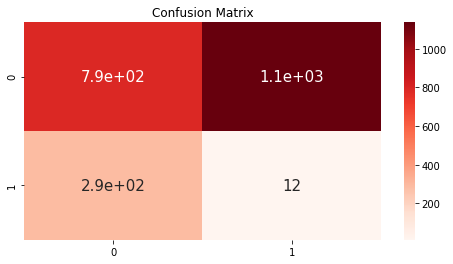

--> 0.02 F1 Score achieved


In [384]:
#Evaluation = EvaluateTest(np.asarray(p_label),yte)
Evaluation = EvaluateTest(np.asarray(yte/1.),np.asarray(p_label))
print("--> {} F1 Score achieved".format(Evaluation["Fscore"]))

--> An AUC value of 0.08 achieved


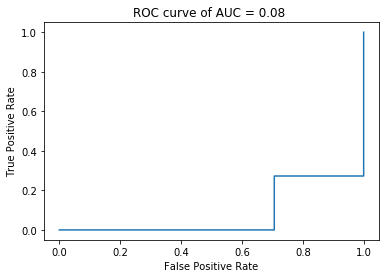

In [385]:
Auc = computeRoc(yte, p_val)